<a href="https://colab.research.google.com/github/FestuMiles/classification-model-unza-publications/blob/main/Classification_of_unza_faculty_research_interests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Business Understanding


##Problem Statement
The University of Zambia (UNZA) produces numerous research publications annually across diverse faculties. However, these publications are not systematically classified according to Zambia’s Vision 2030 sector categories, making it challenging for policymakers, funding bodies, and administrators to assess how research aligns with national development priorities. Manual classification is time-consuming, inconsistent, and inefficient. There is a need for an automated system to classify research outputs into Vision 2030 sectors using only publication titles.

##Business Objectives
The objective is to:
* Automate the classification of UNZA faculty research publications into Vision 2030 sector categories.
* Improve accessibility and searchability of research outputs by sector.
* Enable faster and more consistent reporting for stakeholders.

Success in real-world terms means stakeholders can easily retrieve research outputs relevant to specific Vision 2030 sectors making the classification process faster, more consistent, and requires minimal






##Data Mining Goals
* We will collect, understand the data of UNZA faculty member’s publications
* We prepare the training and testing data which includes include cleaning, transforming, integrating, and formatting data for modeling.
* We will build a supervised machine learning classification model that:
> * Takes a publication title as input.
> *	Predicts the most likely Vision 2030 sector category (e.g., Agriculture, Energy, Health, Education, etc.).
> * Is trained and evaluated using labeled publication title data from UNZA faculty research.
* We will assesses the quality and effectiveness of the model ensuring the results achieve the business objectives



##Initial Project Success Criteria
* **Model Performance**: The classification model should achieve at least 80% accuracy on unseen test data.
* **Usability**: The system should output results in a clear and interpretable format for non-technical users.
* **Practical Value**: The automated classification should reduce the manual categorization time by at least 50% compared to the current process.


# Data Understanding

##Data Exploration

In [ ]:
import pandas as pd

In [ ]:
#Mounting to the drive so that created files are saved
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Navigating to the shared team project folder
#instructions: ensure you have created a shortcut of the shared folder in the drive
#root directory
%cd "/content/drive/My Drive/misc-unza25-csc4792-project_team21"

/content/drive/.shortcut-targets-by-id/1rE8kSkQXl-SiU24RkWcyCi02p-dW0Y-1/misc-unza25-csc4792-project_team21


In [ ]:
!ls

Classification_of_unza_faculty_research_interests.ipynb
unza_faculty_publications_details.csv


In [ ]:
pub_details = pd.read_csv('unza_faculty_publications_details.csv')
pub_details.columns = pub_details.columns.str.lower()

In [ ]:
pub_details.shape

(2200, 6)

In [ ]:
pub_details.head()

,title,author,date,abstract,category,main_category
0,The COMESA Free Trade Area: Zambia's Chance to...,"Hatoongo, C. Demetria",2013-10-31,NaN,commerce and trade,Economic Growth and Wealth Creation
1,Pre-colonial trade in Zambia,"Andrew, Roberts",1970,NaN,commerce and trade,Economic Growth and Wealth Creation
2,Economic Introspection: The cure for Africa's ...,"Nchito, Mutembo",2015-06-15,Third world countries have always sought to be...,commerce and trade,Economic Growth and Wealth Creation
3,Analysing Zambia's trade in Comesa : a gravity...,"Kapindula, Chileshe.V.",2019,This paper analyses the factors affecting bila...,commerce and trade,Economic Growth and Wealth Creation
4,Export-led Industrialisation in Zambia: The ca...,"Nyangu, Tennieson C.",2013-11-06,Zambia gained its independence from British ru...,commerce and trade,Economic Growth and Wealth Creation


In [ ]:
pub_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          2200 non-null   object
 1   author         2185 non-null   object
 2   date           2199 non-null   object
 3   abstract       2129 non-null   object
 4   category       2200 non-null   object
 5   main_category  2200 non-null   object
dtypes: object(6)
memory usage: 103.3+ KB


In [ ]:
pub_details.describe()

,title,author,date,abstract,category,main_category
count,2200,2185,2199,2129,2200,2200
unique,1730,1582,387,1691,22,3
top,Examining the sustainability of green building...,University of Zambia,2019,"Striving for a greener, healthier and more sus...",commerce and trade,Economic Growth and Wealth Creation
freq,9,34,182,9,100,1100


In [ ]:
pub_details.shape

(2200, 6)

In [ ]:
pub_details.columns

Index(['title', 'author', 'date', 'abstract', 'category', 'main_category'], dtype='object')

In [ ]:
pub_details.dtypes

,0
title,object
author,object
date,object
abstract,object
category,object
main_category,object


In [ ]:
pub_details.duplicated().sum()

np.int64(22)

In [ ]:
pub_details['date'].unique()        # Distinct years
pub_details['title'].value_counts() # Top publication venues
pub_details['author'].str.split(',').explode().value_counts() # Author frequency

,count
author,
Phiri,46
Daka,37
University of Zambia,34
Banda,31
Mulenga,29
...,...
Shankwaya,1
Hampango,1
Mbolela,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

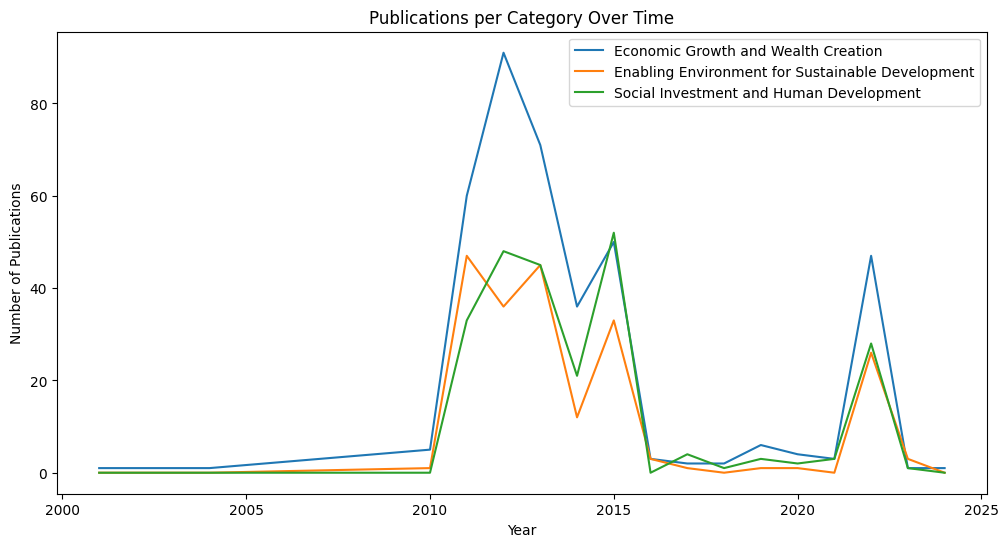

In [ ]:
import matplotlib.pyplot as plt

# Convert date to datetime
pub_details['date'] = pd.to_datetime(pub_details['date'], errors='coerce')

# Group by year and category
pub_counts = pub_details.groupby([pub_details['date'].dt.year, 'main_category']).size().unstack(fill_value=0)

# Line plot
plt.figure(figsize=(12,6))
for category in pub_counts.columns:
    plt.plot(pub_counts.index, pub_counts[category], label=category)

plt.title("Publications per Category Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.legend()
plt.show()


In [ ]:
from collections import Counter

/tmp/ipython-input-4042142875.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_authors, x='num_publications', y='author', palette='viridis')


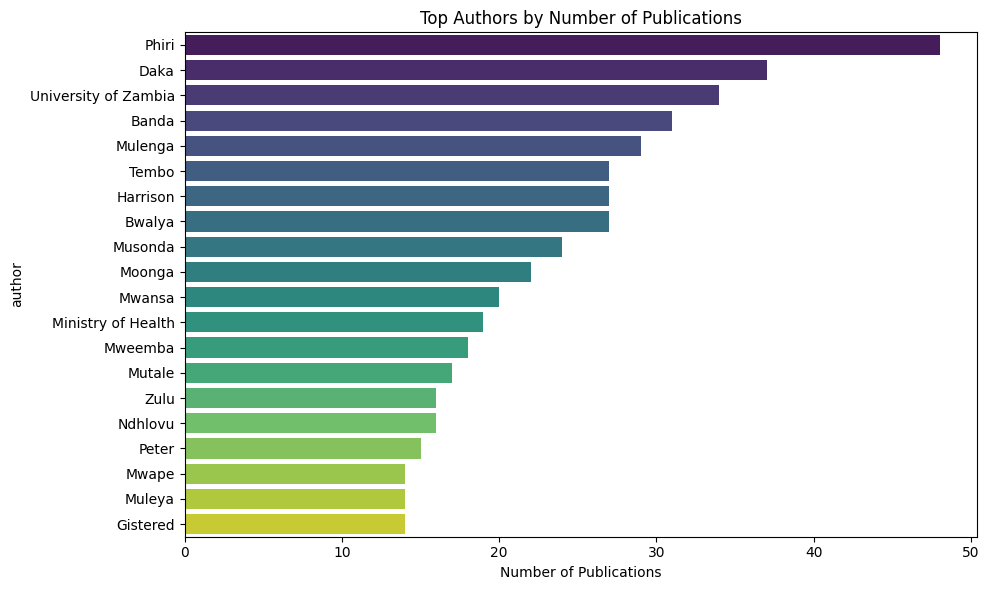

In [ ]:
# Split authors
authors_list = pub_details['author'].dropna().str.split(',').sum()

# Strip whitespace and drop empty strings
authors_list = [a.strip() for a in authors_list if a.strip() != ""]

author_counts = Counter(authors_list)
top_authors = pd.DataFrame(author_counts.most_common(20), columns=['author','num_publications'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_authors, x='num_publications', y='author', palette='viridis')
plt.title("Top Authors by Number of Publications")
plt.xlabel("Number of Publications")
plt.ylabel("author")
plt.tight_layout()
plt.show()

In [ ]:
# # Drop rows without authors
# df_authors = pub_details.dropna(subset=['author'])

# author_list = []
# for i, row in df_authors.iterrows():
#     authors = row['author'].split(',')
#     authors = [a.strip() for a in authors if a.strip() != ""]
#     for author in authors:
#         author_list.append(author)

# # Count publications per author
# author_df = pd.DataFrame(author_list, columns=['author'])
# top_authors = author_df['author'].value_counts().head(10).reset_index()
# top_authors.columns = ['author', 'num_publications']

# # Plot
# plt.figure(figsize=(10,6))
# sns.barplot(data=top_authors, x='num_publications', y='author', palette='plasma')
# plt.title("Top Authors by Number of Publications")
# plt.xlabel("Number of Publications")
# plt.ylabel("Author")
# plt.tight_layout()
# plt.show()


##Written Summary of Findings

The dataset on UNZA faculty publications contains records of 116 publications with the
following columns: title, authors, year, venue, abstract, num_citations, and url_scholarbib.
The data types are mostly strings (object) with year and num_citations stored as numeric
values. From the info() check, we see that some entries have missing values in year and
venue, while others contain empty author fields. A shape check confirms that there are 116
rows and 7 columns, and a duplicate check shows that there are no exact duplicate rows.
Descriptive statistics reveal that the number of citations per paper ranges from 0 to 229, with
an average of about 7 citations, though the distribution is highly skewed—most papers have
fewer than 5 citations.

Looking at publication trends over time, the dataset spans from 2000 to 2025, but research
activity was minimal before 2015, with only one or two papers published in some years. The
trend changed significantly after 2016, showing steady growth. The most productive years
were 2023 with 21 publications and 2024 with 19 publications, marking the peak of
research activity in the dataset. This indicates that faculty research output has grown
substantially in the last decade, suggesting stronger academic engagement and improved
research culture.

When analyzing author productivity, a small group of researchers contributes the majority of
publications. J Phiri leads with 51 publications, followed by M Nyirenda with 25, and then
C Sikasote with 8 and L Mzyece with 7. This demonstrates that research output is
concentrated among a few prolific authors, highlighting strong individual leadership in
research but also suggesting that overall faculty contributions may be unevenly distributed.

In terms of research impact measured by citations, C Sikasote emerges as the most
influential author with 285 citations, despite having fewer publications than J Phiri.
International collaborators such as A Sokolov and N Subramani also stand out, each with
229 citations, while BGJ Knols contributes significantly with 134 citations. This shows that
collaborative and high-quality research is yielding greater academic visibility, and that
impact is not strictly tied to the number of papers produced but also to their relevance and
recognition within the academic community.

# DATA PREPARATION

## DATA CLEANING

Importing useful libraries

In [ ]:
import os, re, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
nltk.download('stopwords')
nltk.download("punkt_tab")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


We  selected a subset of features that are likely to be predictive for our goal of categorizying publications according to the vision 2030

In [ ]:
pub_details = pub_details[['title','category','main_category']]
pub_details.head()

,title,category,main_category
0,The COMESA Free Trade Area: Zambia's Chance to...,commerce and trade,Economic Growth and Wealth Creation
1,Pre-colonial trade in Zambia,commerce and trade,Economic Growth and Wealth Creation
2,Economic Introspection: The cure for Africa's ...,commerce and trade,Economic Growth and Wealth Creation
3,Analysing Zambia's trade in Comesa : a gravity...,commerce and trade,Economic Growth and Wealth Creation
4,Export-led Industrialisation in Zambia: The ca...,commerce and trade,Economic Growth and Wealth Creation


Publication titles were standardized by converting text to lowercase, normalizing whitespace, and removing duplicates. This step ensures consistency, prevents redundancy, and avoids bias from repeated records.

In [ ]:
print(f'Number of records before dropping duplicates: {len(pub_details)}')
#Convert to lower case titles
pub_details['title'] = pub_details['title'].str.lower().str.replace(r"\s+", " ", regex=True).str.strip()

# Remove duplicate rows, keeping the first occurrence
pub_details = pub_details.drop_duplicates(subset=['title'], keep='first')

print(f'Number of records after dropping duplicates: {len(pub_details)}')

Number of records before dropping duplicates: 2200
Number of records after dropping duplicates: 1720


 For title classification, we decided to drop entries without a category(uncategorized) because they are not useful. Duplicate titles were removed to reduce label leakage and bias.

In [ ]:
pub_details['category'].duplicated().value_counts().sum()

np.int64(1720)

In [ ]:
pub_details['main_category'].value_counts().sum()

np.int64(1720)

In [ ]:
pub_details = pub_details[pub_details['category'] != 'Uncategorized']

In [ ]:
pub_details.head()

,title,category,main_category
0,the comesa free trade area: zambia's chance to...,commerce and trade,Economic Growth and Wealth Creation
1,pre-colonial trade in zambia,commerce and trade,Economic Growth and Wealth Creation
2,economic introspection: the cure for africa's ...,commerce and trade,Economic Growth and Wealth Creation
3,analysing zambia's trade in comesa : a gravity...,commerce and trade,Economic Growth and Wealth Creation
4,export-led industrialisation in zambia: the ca...,commerce and trade,Economic Growth and Wealth Creation


In [ ]:
pub_details.shape

(1720, 3)

**Title Preprocessing**

Publication titles were cleaned and standardized through several steps: lowercasing, removal of HTML artifacts, punctuation, and extra whitespace. Stopwords were removed to reduce noise, and stemming was applied to normalize words to their root forms. Additional features, such as character length and word count of titles, were generated to support further analysis. These preprocessing steps ensure that only meaningful textual patterns are retained, improving the quality of inputs for text mining and classification tasks.

In [ ]:
# cleaning and preprocessing publication titles

def basic_text_clean(s: pd.Series) -> pd.Series:
    s = s.str.lower()
    s = s.str.replace(r"&amp;", "and", regex=True)
    s = s.str.replace(r"[^a-z\s]", " ", regex=True)
    s = s.str.replace(r"\s+", " ", regex=True).str.strip()
    return s

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

def stem_text(words):
    tokens = word_tokenize(words)
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

pub_details["cleaned_title"] = basic_text_clean(pub_details['title'])
pub_details["cleaned_title"] = pub_details["cleaned_title"].apply(remove_stopwords)
pub_details["cleaned_title"] = pub_details["cleaned_title"].apply(stem_text)
pub_details["cleaned_title_len"] = pub_details["cleaned_title"].str.len()
pub_details["title_word_count"] = pub_details["cleaned_title"].str.split().str.len()

pub_details[["cleaned_title","cleaned_title_len","title_word_count"]].head()

,cleaned_title,cleaned_title_len,title_word_count
0,comesa free trade area zambia chanc benefit wo...,67,11
1,pre coloni trade zambia,23,4
2,econom introspect cure africa trade gener econ...,118,16
3,analys zambia trade comesa graviti model approach,49,7
4,export led industrialis zambia case multi faci...,59,9


In [ ]:
pub_details.head()


,title,category,main_category,cleaned_title,cleaned_title_len,title_word_count
0,the comesa free trade area: zambia's chance to...,commerce and trade,Economic Growth and Wealth Creation,comesa free trade area zambia chanc benefit wo...,67,11
1,pre-colonial trade in zambia,commerce and trade,Economic Growth and Wealth Creation,pre coloni trade zambia,23,4
2,economic introspection: the cure for africa's ...,commerce and trade,Economic Growth and Wealth Creation,econom introspect cure africa trade gener econ...,118,16
3,analysing zambia's trade in comesa : a gravity...,commerce and trade,Economic Growth and Wealth Creation,analys zambia trade comesa graviti model approach,49,7
4,export-led industrialisation in zambia: the ca...,commerce and trade,Economic Growth and Wealth Creation,export led industrialis zambia case multi faci...,59,9


**Standardizing Column Names and String Values**

Column names were converted to snake_case for consistency and easier reference in later processing. String fields were normalized by removing excess whitespace and replacing placeholder values (e.g., nan, null, none, empty strings) with proper missing values (NaN). This standardization improves dataset readability, prevents errors during analysis, and ensures missing data is handled consistently.

In [ ]:
def to_snake_case(name: str) -> str:
    name = name.strip()
    name = re.sub(r"[^\w\s]", " ", name)
    name = re.sub(r"\s+", "_", name)
    return name.lower()

def standardize_column_names(pub_details: pd.DataFrame) -> pd.DataFrame:
    pub_details = pub_details.copy()
    pub_details.columns = [to_snake_case(c) for c in pub_details.columns]
    return pub_details

def strip_strings(pub_details: pd.DataFrame) -> pd.DataFrame:
    pub_details = pub_details.copy()
    for col in pub_details.select_dtypes(include=["object"]).columns:
        pub_details[col] = pub_details[col].astype(str).str.replace(r"\s+", " ", regex=True).str.strip()
        pub_details[col] = pub_details[col].replace(
            {"nan": np.nan, "none": np.nan, "null": np.nan, "na": np.nan, "": np.nan}
        )
    return pub_details

pub_details = standardize_column_names(pub_details)
pub_details = strip_strings(pub_details)
pub_details.head()

,title,category,main_category,cleaned_title,cleaned_title_len,title_word_count
0,the comesa free trade area: zambia's chance to...,commerce and trade,Economic Growth and Wealth Creation,comesa free trade area zambia chanc benefit wo...,67,11
1,pre-colonial trade in zambia,commerce and trade,Economic Growth and Wealth Creation,pre coloni trade zambia,23,4
2,economic introspection: the cure for africa's ...,commerce and trade,Economic Growth and Wealth Creation,econom introspect cure africa trade gener econ...,118,16
3,analysing zambia's trade in comesa : a gravity...,commerce and trade,Economic Growth and Wealth Creation,analys zambia trade comesa graviti model approach,49,7
4,export-led industrialisation in zambia: the ca...,commerce and trade,Economic Growth and Wealth Creation,export led industrialis zambia case multi faci...,59,9


**Category Standardization**

Category values were cleaned by converting text to lowercase, removing extra whitespace, and trimming leading/trailing spaces. This ensures consistent labeling of categories, prevents duplication caused by formatting variations, and supports accurate grouping and analysis.

In [ ]:
def basic_categ_clean(s: pd.Series) -> pd.Series:
    s = s.str.lower()
    s = s.str.replace(r"\s+", " ", regex=True).str.strip()
    return s

pub_details["category"] = basic_categ_clean(pub_details['category'])

In [ ]:
pub_details.head()

,title,category,main_category,cleaned_title,cleaned_title_len,title_word_count
0,the comesa free trade area: zambia's chance to...,commerce and trade,Economic Growth and Wealth Creation,comesa free trade area zambia chanc benefit wo...,67,11
1,pre-colonial trade in zambia,commerce and trade,Economic Growth and Wealth Creation,pre coloni trade zambia,23,4
2,economic introspection: the cure for africa's ...,commerce and trade,Economic Growth and Wealth Creation,econom introspect cure africa trade gener econ...,118,16
3,analysing zambia's trade in comesa : a gravity...,commerce and trade,Economic Growth and Wealth Creation,analys zambia trade comesa graviti model approach,49,7
4,export-led industrialisation in zambia: the ca...,commerce and trade,Economic Growth and Wealth Creation,export led industrialis zambia case multi faci...,59,9


##Data Transformation

**Categorical Encoding**

The category field was transformed into binary indicator variables using one-hot encoding. Each unique category became its own column, with values of 1 or 0 indicating the presence or absence of that category for a publication. This step converts categorical information into a numerical format suitable for machine learning models and facilitates multi-label analysis.

In [ ]:
dummies = pub_details['category'].str.get_dummies(sep=';')
pub_details = pd.concat([pub_details, dummies], axis=1)
pub_details.head()

,title,category,main_category,cleaned_title,cleaned_title_len,title_word_count,"agriculture, livestock and fisheries",commerce and trade,communication,construction,...,housing and settlements,infrastructure,manufacturing,mining,population,"science, technology and innovation",tourism,transport,water and sanitation,youth and child development
0,the comesa free trade area: zambia's chance to...,commerce and trade,Economic Growth and Wealth Creation,comesa free trade area zambia chanc benefit wo...,67,11,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,pre-colonial trade in zambia,commerce and trade,Economic Growth and Wealth Creation,pre coloni trade zambia,23,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,economic introspection: the cure for africa's ...,commerce and trade,Economic Growth and Wealth Creation,econom introspect cure africa trade gener econ...,118,16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,analysing zambia's trade in comesa : a gravity...,commerce and trade,Economic Growth and Wealth Creation,analys zambia trade comesa graviti model approach,49,7,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,export-led industrialisation in zambia: the ca...,commerce and trade,Economic Growth and Wealth Creation,export led industrialis zambia case multi faci...,59,9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


**Bag-of-Words Representation**

A Bag-of-Words (BoW) model was applied to the cleaned publication titles using CountVectorizer. This transformed the text into a document-term matrix, where each column represents a unique token and each row corresponds to a publication. The resulting numerical features capture word frequencies, enabling the application of statistical and machine learning techniques for classification and clustering.

In [ ]:
bow_vetorizer = CountVectorizer()
bow_matrix = bow_vetorizer.fit_transform(pub_details['cleaned_title'])
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vetorizer.get_feature_names_out())
bow_df.head()

,abattoir,abil,abolit,abort,absa,absolut,absorpt,abund,abus,academ,...,zesco,zigbe,zihp,zimba,zimbabw,znadwo,znbc,zone,zoonot,zra
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**TF-IDF Feature Extraction**

The cleaned publication titles were transformed using TF-IDF (Term Frequency–Inverse Document Frequency) vectorization. This converts text into numerical features that reflect not only word occurrence but also the relative importance of each word across the dataset. TF-IDF emphasizes terms that are more informative for distinguishing between documents, providing a robust input for text classification and other machine learning tasks.

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(pub_details['cleaned_title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df.head()

,abattoir,abil,abolit,abort,absa,absolut,absorpt,abund,abus,academ,...,zesco,zigbe,zihp,zimba,zimbabw,znadwo,znbc,zone,zoonot,zra
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.383409,0.0,0.0


# MODELING

## Spliting the data

We are spliting the data into two sets, one using categories and the other using the main categories. Using the main categories allows us to maximize the dataset per category, which we believe will improve the prediction accuracy.

To evaluate the model's ability to generalize to unseen data, we will split the dataset into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance. We will use a common split ratio, such as 80% for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(pub_details['cleaned_title'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

X = tfidf_df

y = pub_details['category']
# Spliting the testing and training data based on sub-categories
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

y = pub_details['main_category']
# Spliting the testing and training data based on main categories
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=42
)

We used Naive Bayes, Logistic Regression, and Linear SVM because they are some of the most effective algorithms for text classification. Naive Bayes is simple and works well with word frequencies, Logistic Regression is strong and interpretable for high-dimensional text data, and Linear SVM is powerful for separating categories in sparse TF-IDF features. Comparing these three gives us a good balance of speed, accuracy, and reliability.

In [ ]:
# Importing the libraries for modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

## Modeling using specific categories

Using the three algorithms, we trained three models based on the specififc categories (21 categories) from the collected data set.

In [141]:
nb_model1 = MultinomialNB(alpha=1.0)
nb_model1 .fit(X_train1, y_train1)

MultinomialNB()

In [142]:

svc_model1 = LinearSVC(C=1.0)
svc_model1.fit(X_train1, y_train1)

LinearSVC()

In [143]:

lr_model1 = LogisticRegression(max_iter=1000)
lr_model1.fit(X_train1, y_train1)

LogisticRegression(max_iter=1000)

## Modeling using main categories

Using the three algorithms, we again trained three models based on the main categories (3 categories) from the collected data set.

In [144]:
nb_model2 = MultinomialNB(alpha=1.0)
nb_model2 .fit(X_train2, y_train2)

MultinomialNB()

In [145]:
svc_model2 = LinearSVC(C=1.0)
svc_model2.fit(X_train2, y_train2)

LinearSVC()

In [146]:
lr_model2 = LogisticRegression(max_iter=1000)
lr_model2.fit(X_train2, y_train2)

LogisticRegression(max_iter=1000)

# Evaluation


In [147]:
from sklearn.metrics import classification_report, confusion_matrix

## Evalution of the three models trained on specific categories


===== Naive Bayes =====

                                      precision    recall  f1-score   support

agriculture, livestock and fisheries       0.34      0.61      0.44        18
                  commerce and trade       0.26      0.67      0.38        18
                       communication       0.40      0.73      0.52        22
                        construction       0.71      0.48      0.57        21
                 disaster management       0.33      0.10      0.15        21
                 economic management       0.50      0.12      0.19        17
                           education       0.54      1.00      0.70        22
                              energy       0.64      0.50      0.56        14
   environment and natural resources       0.50      0.20      0.29        10
                              gender       0.52      0.84      0.64        19
                          governance       0.53      0.64      0.58        14
                              health 

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


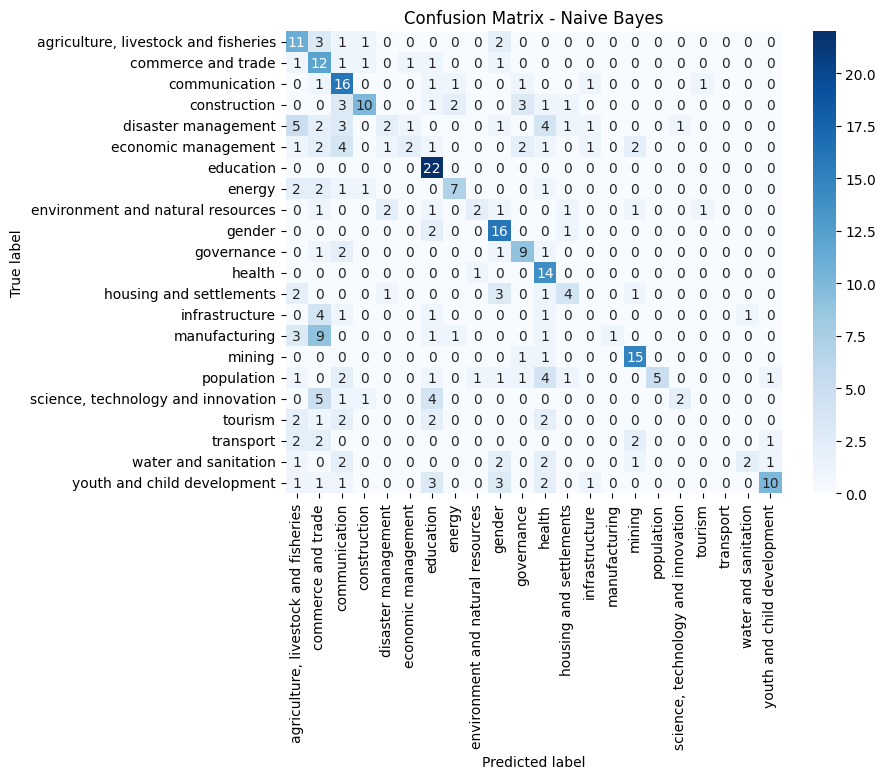

In [148]:
print(f"\n===== Naive Bayes =====\n")
y_pred = nb_model1.predict(X_test1)
print(classification_report(y_test1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test1, y_pred, labels=nb_model1.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=nb_model1.classes_,
            yticklabels=nb_model1.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


===== Linear SVM =====

                                      precision    recall  f1-score   support

agriculture, livestock and fisheries       0.52      0.61      0.56        18
                  commerce and trade       0.33      0.44      0.38        18
                       communication       0.61      0.77      0.68        22
                        construction       0.61      0.52      0.56        21
                 disaster management       0.38      0.14      0.21        21
                 economic management       0.50      0.29      0.37        17
                           education       0.61      0.86      0.72        22
                              energy       0.56      0.64      0.60        14
   environment and natural resources       0.22      0.20      0.21        10
                              gender       0.89      0.89      0.89        19
                          governance       0.69      0.79      0.73        14
                              health  

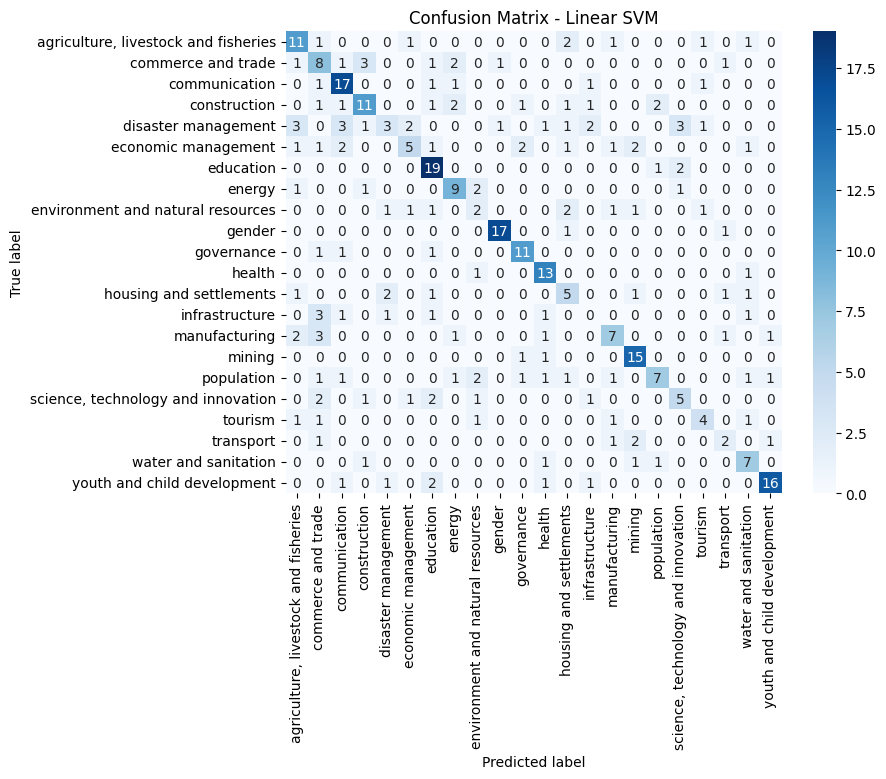

In [149]:
print(f"\n===== Linear SVM =====\n")
y_pred = svc_model1.predict(X_test1)
print(classification_report(y_test1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test1, y_pred, labels=svc_model1.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=svc_model1.classes_,
            yticklabels=svc_model1.classes_)
plt.title("Confusion Matrix - Linear SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()



===== Logistic Regresion =====

                                      precision    recall  f1-score   support

agriculture, livestock and fisheries       0.30      0.67      0.41        18
                  commerce and trade       0.21      0.50      0.30        18
                       communication       0.58      0.82      0.68        22
                        construction       0.86      0.57      0.69        21
                 disaster management       0.18      0.10      0.12        21
                 economic management       0.62      0.29      0.40        17
                           education       0.53      0.91      0.67        22
                              energy       0.54      0.50      0.52        14
   environment and natural resources       0.50      0.30      0.38        10
                              gender       0.86      0.95      0.90        19
                          governance       0.73      0.79      0.76        14
                              

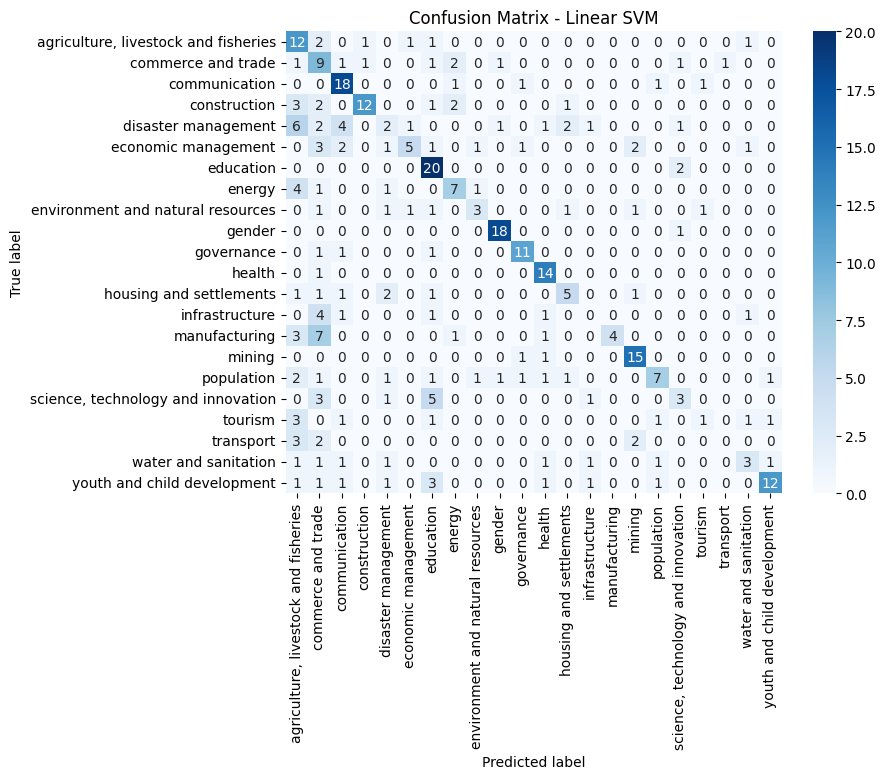

In [150]:
print(f"\n===== Logistic Regresion =====\n")
y_pred = lr_model1.predict(X_test1)
print(classification_report(y_test1, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test1, y_pred, labels=lr_model1.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=lr_model1.classes_,
            yticklabels=lr_model1.classes_)
plt.title("Confusion Matrix - Linear SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


## Evalution of the three models trained on main categories


===== Naive Bayes =====

                                                  precision    recall  f1-score   support

             Economic Growth and Wealth Creation       0.63      0.96      0.76       163
Enabling Environment for Sustainable Development       0.89      0.10      0.18        80
         Social Investment and Human Development       0.80      0.69      0.74       101

                                        accuracy                           0.68       344
                                       macro avg       0.77      0.58      0.56       344
                                    weighted avg       0.74      0.68      0.62       344



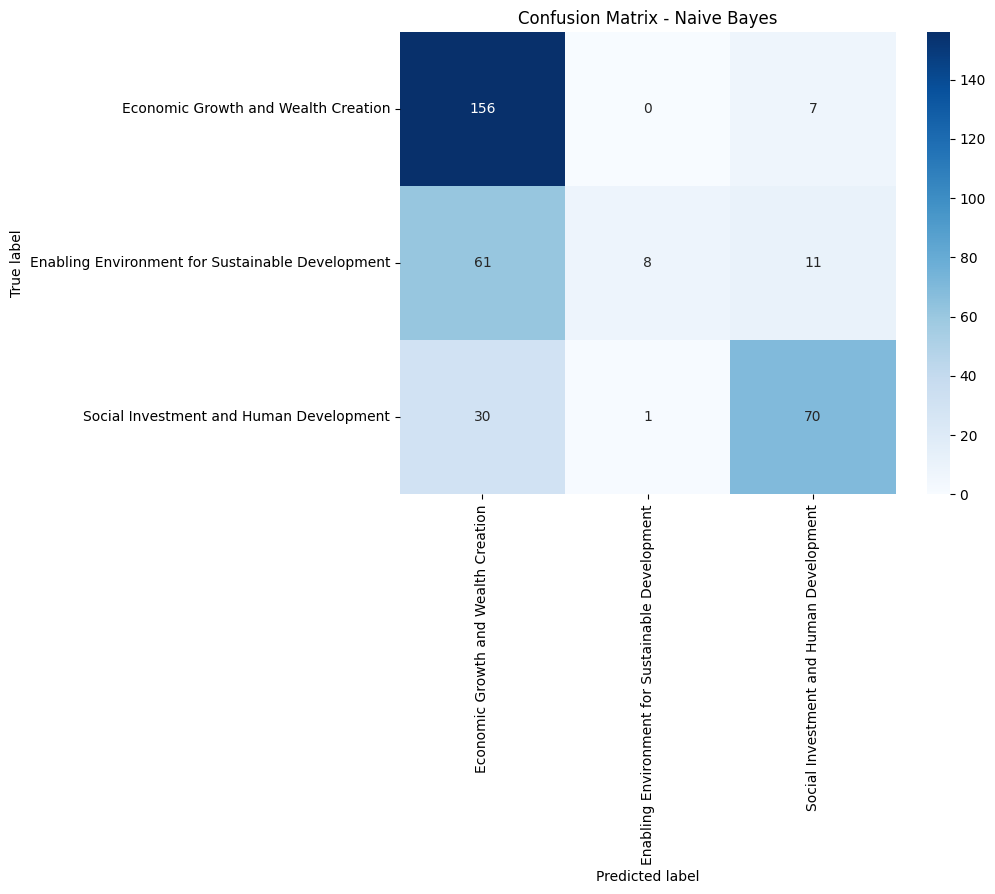

In [151]:
print(f"\n===== Naive Bayes =====\n")
y_pred = nb_model2.predict(X_test2)
print(classification_report(y_test2, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test2, y_pred, labels=nb_model2.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=nb_model2.classes_,
            yticklabels=nb_model2.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()
